# Airbnb Stock Market Analysis - RNN

* **Dataset**: https://www.kaggle.com/datasets/whenamancodes/airbnb-inc-stock-market-analysis

In [74]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, LSTM, Input, Dropout

In [75]:
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [76]:
data = pd.read_csv("../datasets/airbnb-stock-market-analysis/ABNB.csv")

In [77]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [78]:
data.shape

(454, 7)

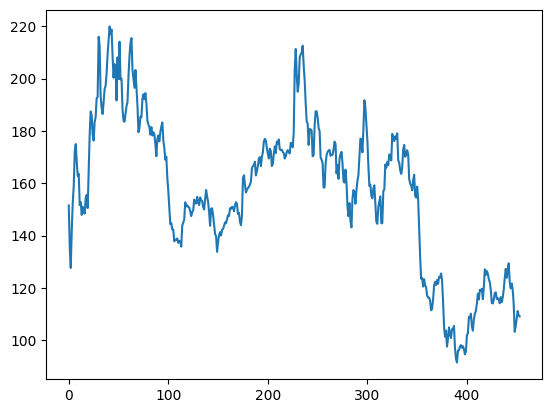

In [79]:
plt.plot(data["High"])

In [80]:
print(f"From {min(set(data["Date"]))} to {max(set(data["Date"]))}")

From 2020-12-11 to 2022-09-30


In [81]:
start_date = '2021-01-01'
end_date = '2021-01-31'
df = data[data['Date'].between(start_date, end_date)]

In [82]:
df.shape

(19, 7)

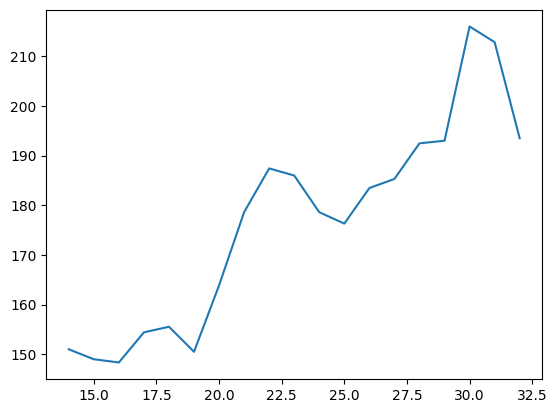

In [83]:
plt.plot(df["High"])

In [84]:
df = df.drop(['Date'], axis=1)

In [85]:
def get_slices(data, size):
    data = np.asarray(data)
    return np.lib.stride_tricks.sliding_window_view(data, size)[:-1]

In [86]:
scaled = (df["High"]/df["High"].max()).values

In [87]:
slices = get_slices(scaled, 10)

In [88]:
y = [slices[i + 1][-1] for i in range(len(slices) - 1)]

In [89]:
y = np.array(y)

In [90]:
x = slices[:-1]
x = np.reshape(x, (x.shape[0], 1, x.shape[1])) 

In [91]:
model = Sequential([
    Input(shape=(1,10)),
    LSTM(16),
    Dropout(0.2),
    Dense(1)
])

model.compile(loss='mse', metrics=['mae'])
result = model.fit(x, y, epochs=100, validation_split=0.2)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0944 - mae: 1.0410 - val_loss: 1.3372 - val_mae: 1.1564
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.9232 - mae: 0.9581 - val_loss: 1.2451 - val_mae: 1.1158
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.8865 - mae: 0.9373 - val_loss: 1.1754 - val_mae: 1.0841
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.8943 - mae: 0.9431 - val_loss: 1.1129 - val_mae: 1.0549
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.8687 - mae: 0.9275 - val_loss: 1.0617 - val_mae: 1.0304
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.7794 - mae: 0.8803 - val_loss: 1.0124 - val_mae: 1.0061
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.7663 - mae: 0.8737 - val_loss: 0.9686 - val_mae: 0.9841
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.7172 - mae: 0.8420 - val_loss: 0.9306 - val_mae: 0.9646
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.7841 - mae: 0.

In [92]:
import matplotlib.pyplot as plt

def plot_training_history(history, metric='mae', figsize=(10, 6)):
   plt.figure(figsize=figsize)
   
   plt.plot(history.history[metric], label='train')
   plt.plot(history.history[f'val_{metric}'], label='validation')
   
   plt.title(f'Model {metric}')
   plt.xlabel('Epoch')
   plt.ylabel(metric.capitalize())
   plt.legend(loc='upper left')
   plt.tight_layout()
   
   return plt.gcf()

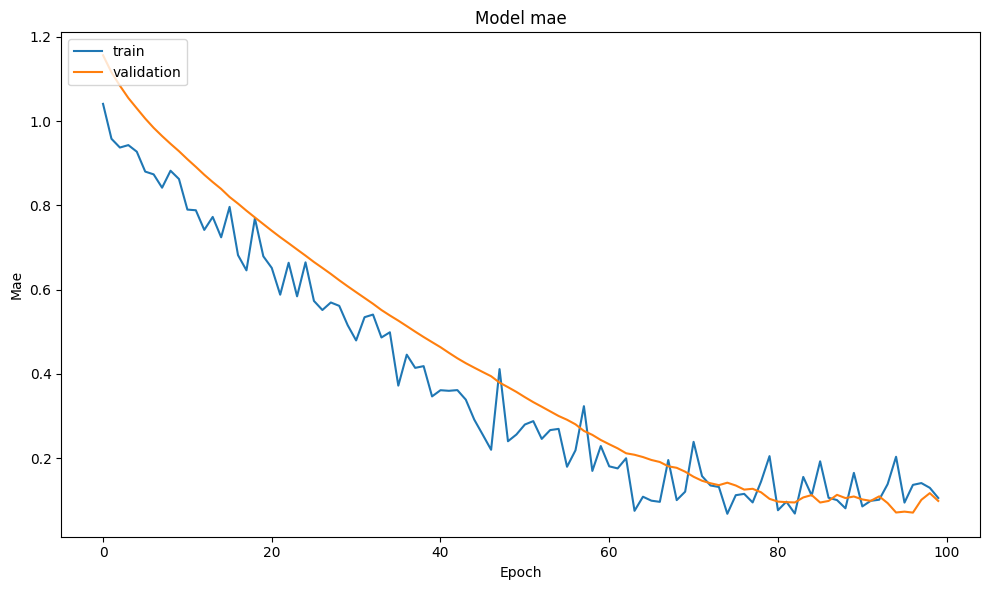

In [93]:
plot_training_history(result)
plt.show()

In [94]:
def future_predictions(slices, model, shape = (1,1,10), steps = 10):
    predictions = []
    x = slices[-1]
    for _ in range(steps):
        p = model.predict(x.reshape(shape))[0][0]
        predictions.append(p)
        x = np.append(x[1:], p)

    return x

In [95]:
_predictions = future_predictions(slices, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


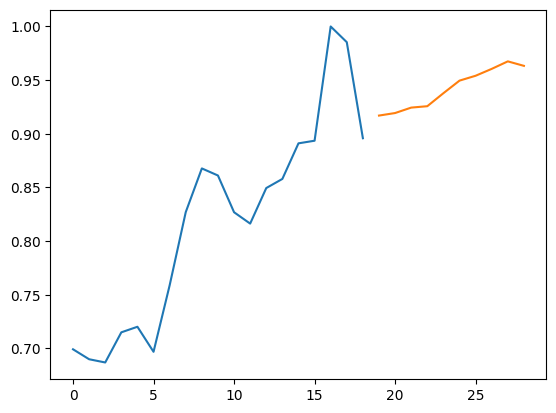

In [96]:
plt.plot(scaled)
plt.plot(np.arange(len(scaled), len(scaled) + len(_predictions)), _predictions)